CYNTHIA VIDAL OVANDO

DATA 8B

SNA


**LastFM Social Network Analysis in Asia using Network Theory**

**Network Visualization**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


edges_df = pd.read_csv('lastfm_asia_edges.csv')


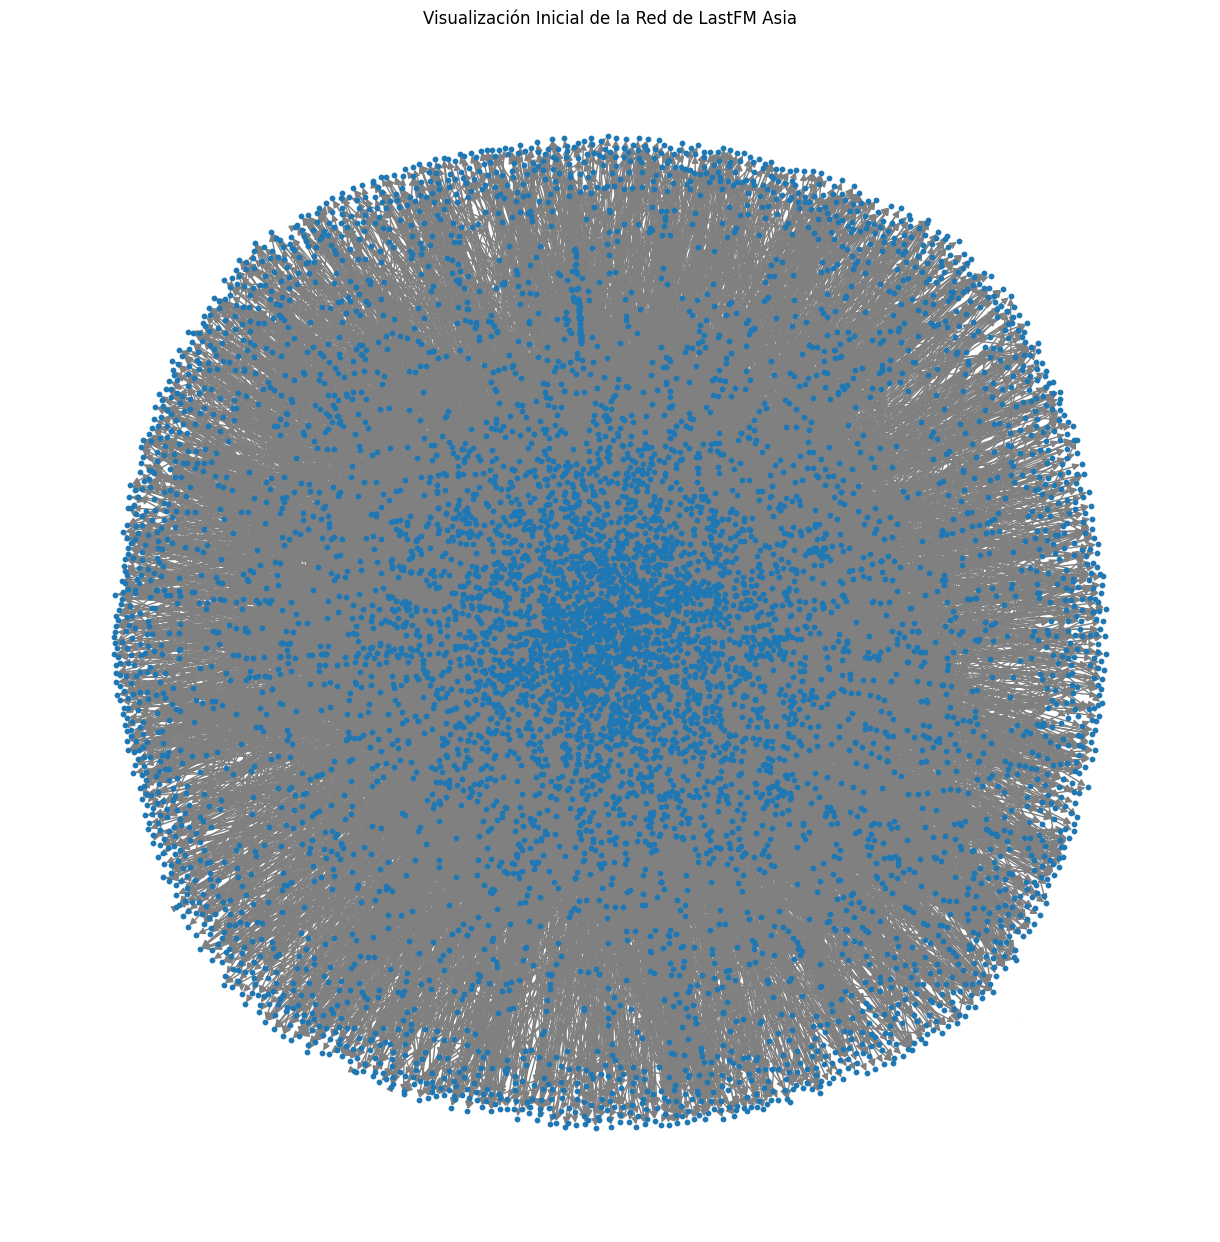

In [2]:
G = nx.from_pandas_edgelist(edges_df, source='node_1', target='node_2', create_using=nx.DiGraph())

plt.figure(figsize=(12, 12))
nx.draw(G, node_size=10, with_labels=False, edge_color='gray')
plt.title("Visualización Inicial de la Red de LastFM Asia")
plt.show()


# Metrics Calculation

In [7]:
edges = pd.read_csv('lastfm_asia_edges.csv', sep='\t')
targets = pd.read_csv('lastfm_asia_target.csv', sep='\t')


print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

Número de nodos: 7624
Número de aristas: 27806


In [9]:
import networkx as nx
import pandas as pd


# Crear el grafo
G = nx.from_pandas_edgelist(edges_df, source='node_1', target='node_2', create_using=nx.DiGraph())

# Tamaño de la red
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calcular la longitud promedio de los caminos en componentes fuertemente conectados
if nx.is_strongly_connected(G):
    average_path_length = nx.average_shortest_path_length(G)
else:
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    subgraph = G.subgraph(largest_scc)
    average_path_length = nx.average_shortest_path_length(subgraph)

# Coeficiente de agrupamiento
clustering_coefficient = nx.average_clustering(G.to_undirected())

print(f"Tamaño de la red: {num_nodes} nodos y {num_edges} aristas")
print(f"Longitud promedio de los caminos (en el componente fuertemente conectado más grande): {average_path_length}")
print(f"Coeficiente de agrupamiento promedio: {clustering_coefficient}")


Tamaño de la red: 7624 nodos y 27806 aristas
Longitud promedio de los caminos (en el componente fuertemente conectado más grande): 0
Coeficiente de agrupamiento promedio: 0.2194184243270858


# Grade Distribution

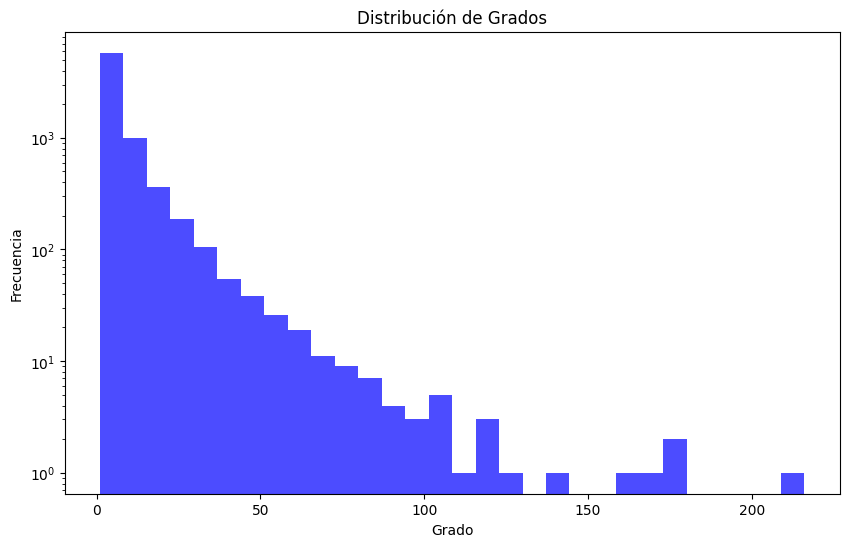

In [10]:
# Obtener los grados de los nodos
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Generar el gráfico de distribución de grados
plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=30, color='blue', alpha=0.7)
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.yscale('log')  # Escala logarítmica para la frecuencia
plt.show()

#  Centrality and Community Detection

**a) Measures of Centrality**

In [11]:
# Centralidad de grado
degree_centrality = nx.degree_centrality(G)

# PageRank
pagerank_centrality = nx.pagerank(G)

# Imprimir los nodos más importantes según PageRank
top_pagerank_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodos por PageRank:")
for node, value in top_pagerank_nodes:
    print(f"Nodo: {node}, PageRank: {value}")


Top 10 nodos por PageRank:
Nodo: 7237, PageRank: 0.007385263137179226
Nodo: 7498, PageRank: 0.006810098607650431
Nodo: 7339, PageRank: 0.006406924018043254
Nodo: 7162, PageRank: 0.00316203678681207
Nodo: 7224, PageRank: 0.002917062627612984
Nodo: 7435, PageRank: 0.0027632728008157846
Nodo: 6519, PageRank: 0.0027062061687505874
Nodo: 7100, PageRank: 0.002589602013111515
Nodo: 7199, PageRank: 0.002569938898947024
Nodo: 7595, PageRank: 0.0025639319249166678


**b) Community Screening**

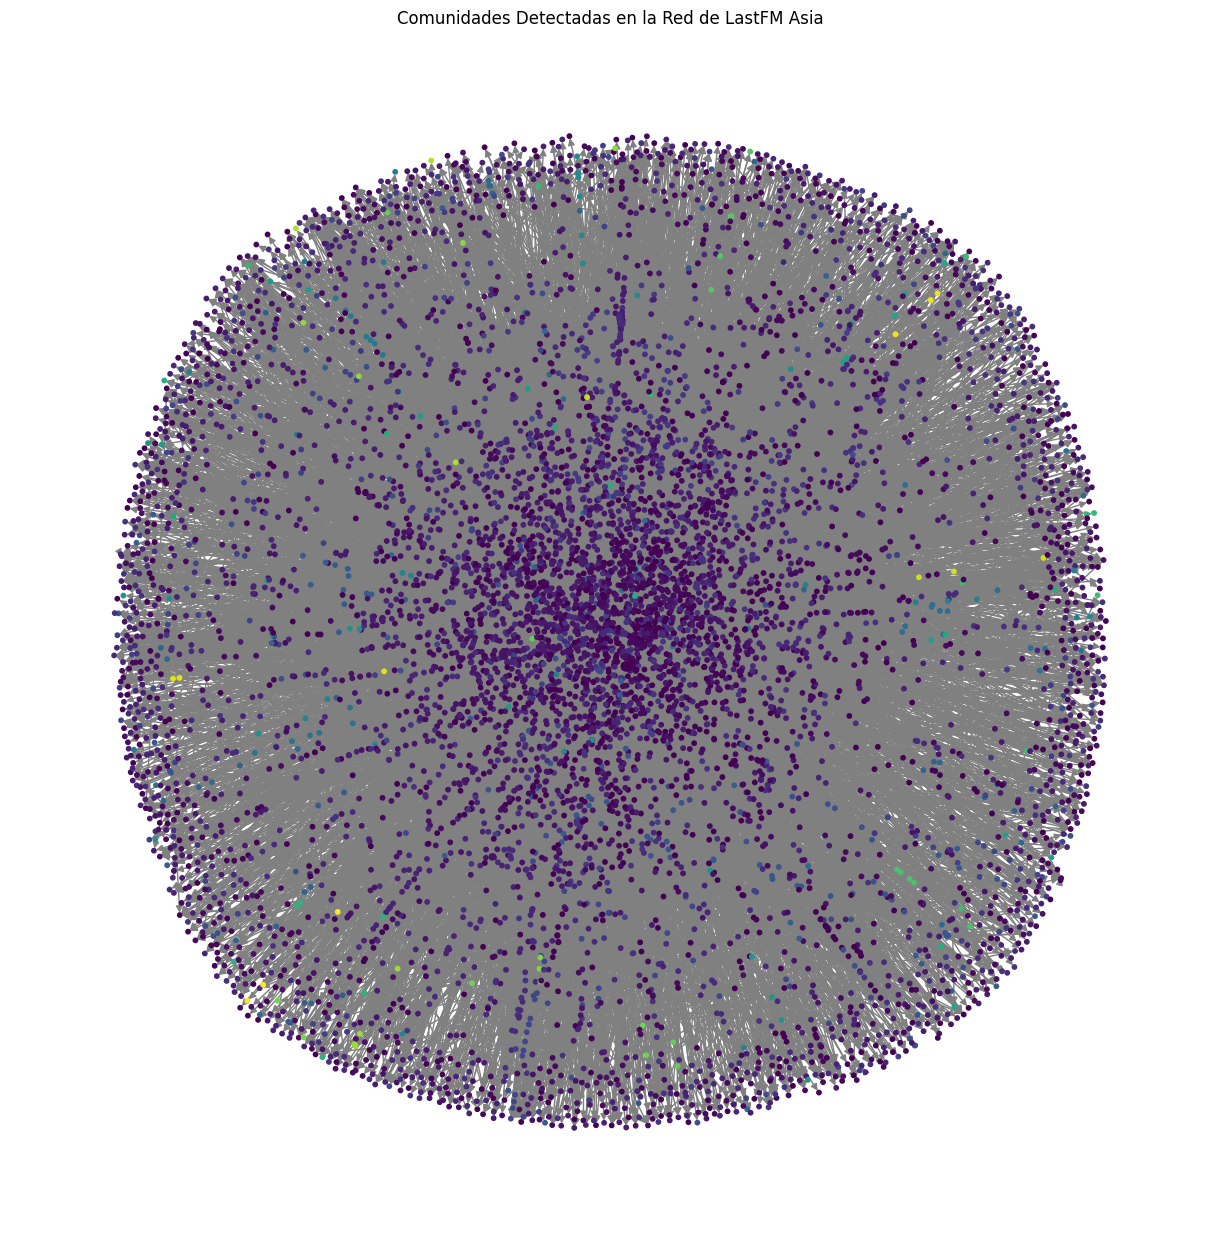

In [12]:
from networkx.algorithms.community import greedy_modularity_communities

# Detectar comunidades utilizando el algoritmo de modularidad
communities = list(greedy_modularity_communities(G.to_undirected()))

# Crear un diccionario de comunidades para colorear los nodos
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Dibujar la red coloreando las comunidades
plt.figure(figsize=(12, 12))
colors = [community_map[node] for node in G.nodes()]
nx.draw(G, node_color=colors, node_size=10, with_labels=False, edge_color='gray', cmap=plt.cm.viridis)
plt.title("Comunidades Detectadas en la Red de LastFM Asia")
plt.show()